In [6]:
import numpy as np
import pandas as pd
import matrixprofile as mp
from matplotlib import pyplot as plt
import scipy as sc
import meters
import seaborn as sns

In [7]:
data = pd.read_csv('lv_data.csv', index_col=0).to_numpy()
data

array([[181.03571429, 144.57142857, 131.35714286, ..., 213.53333333,
        236.26666667, 180.        ],
       [281.5       , 198.5       , 161.5       , ..., 167.75      ,
        105.66666667,  91.16666667],
       [224.57142857, 235.14285714, 231.5       , ..., 271.81395349,
        209.76744186, 160.04651163],
       ...,
       [180.3       , 348.3       , 434.2       , ..., 186.42857143,
        153.64285714, 100.64285714],
       [127.04166667,  99.33333333, 103.625     , ..., 164.53333333,
        109.83333333,  96.8       ],
       [ 70.77777778,  75.        ,  63.22222222, ..., 186.2       ,
        183.2       , 137.5       ]])

In [8]:
def mprofile(ts):
    profile = mp.compute(ts, windows=48)
    figures = mp.visualize(profile)
    ax = plt.gca()
    ax.set_title(f'Matrix profile, 1 day window')

In [9]:
norm_data = (data - np.mean(data, axis=1)[:, np.newaxis]) / np.std(data, axis=1)[:, np.newaxis]
norm_data

array([[-0.5897838 , -0.95193646, -1.0831769 , ..., -0.26702692,
        -0.04124607, -0.60007021],
       [ 0.72355091, -0.05017207, -0.39508472, ..., -0.33682244,
        -0.91556102, -1.05072949],
       [-0.50706511, -0.42187561, -0.45123145, ..., -0.12636279,
        -0.62636255, -1.02703701],
       ...,
       [-1.05634376,  0.28547533,  0.97156021, ..., -1.00739475,
        -1.26925485, -1.69256683],
       [-0.04643146, -0.56048694, -0.48086632, ...,  0.64912812,
        -0.36568697, -0.6074863 ],
       [-0.69081118, -0.64554899, -0.77180666, ...,  0.54651396,
         0.51435398,  0.02445042]])

In [10]:
rows = len(data)
cols = 48 * 31

In [11]:
fft_norm = np.zeros((rows, cols))
for i in range(rows):
    fft_norm[i] = np.abs(np.fft.fft(norm_data[i])) / cols
fft_norm

array([[3.48048949e-15, 9.47763465e-02, 1.68293898e-02, ...,
        5.66365676e-02, 1.68293898e-02, 9.47763465e-02],
       [2.05585250e-15, 5.28083459e-02, 5.16805989e-02, ...,
        2.26284519e-02, 5.16805989e-02, 5.28083459e-02],
       [1.08261667e-15, 1.59486373e-01, 4.66963329e-02, ...,
        7.65156812e-02, 4.66963329e-02, 1.59486373e-01],
       ...,
       [4.08275564e-16, 1.60139567e-01, 7.15894112e-02, ...,
        6.20680157e-02, 7.15894112e-02, 1.60139567e-01],
       [2.71586815e-16, 2.01243203e-02, 7.33157509e-03, ...,
        2.79148313e-02, 7.33157509e-03, 2.01243203e-02],
       [1.96079712e-16, 1.31551153e-01, 5.70189565e-02, ...,
        9.30742314e-02, 5.70189565e-02, 1.31551153e-01]])

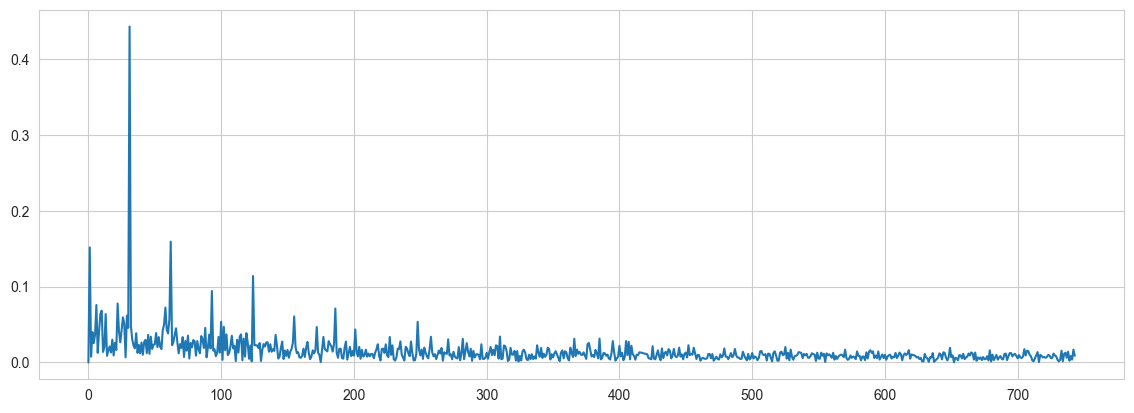

In [39]:
plt.plot(fft_norm[1258,:744])
fig = plt.gcf()
fig.set_figwidth(14)

In [12]:
mean = np.sum(fft_norm, axis=0) / 1488

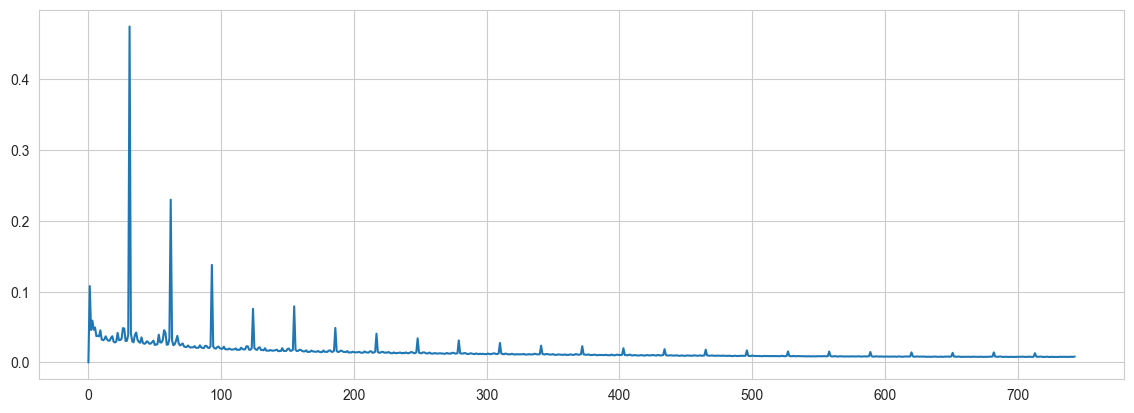

In [40]:
plt.plot(mean[:744])
fig = plt.gcf()
fig.set_figwidth(14)

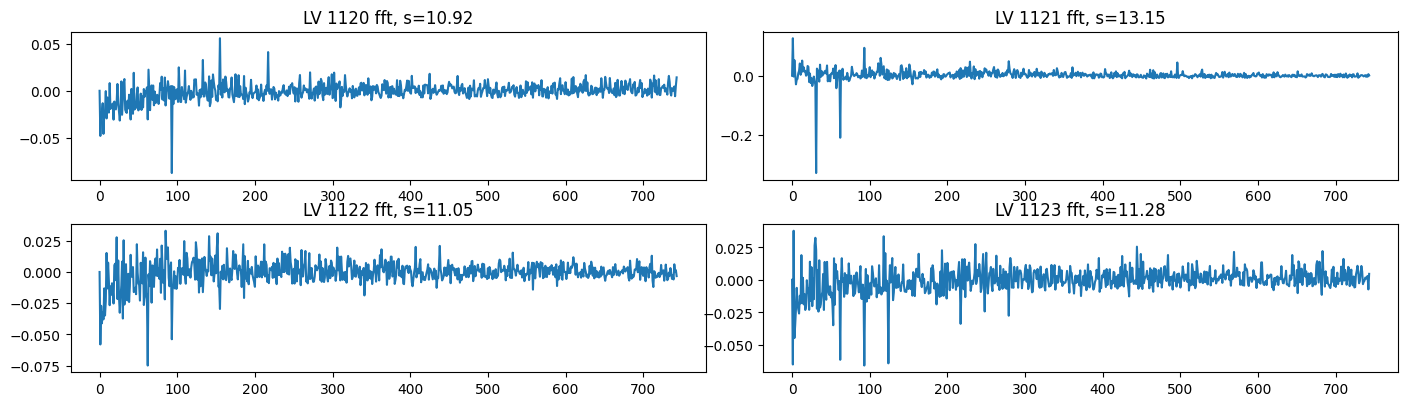

In [303]:
fig, axs = plt.subplots(2, 2, figsize=(14, 4))
plt.tight_layout()
for i in range(4):
    n = 1120 + i
    row = fft_norm[n][:744]
    s = np.sum(row)
    axs[i // 2, i % 2].plot(fft_norm[n][:744] - mean[:744])
    axs[i // 2, i % 2].set_title(f'LV {n} fft, s={round(s, 2)}')
plt.show()

In [14]:
fft_norm

array([[3.48048949e-15, 9.47763465e-02, 1.68293898e-02, ...,
        5.66365676e-02, 1.68293898e-02, 9.47763465e-02],
       [2.05585250e-15, 5.28083459e-02, 5.16805989e-02, ...,
        2.26284519e-02, 5.16805989e-02, 5.28083459e-02],
       [1.08261667e-15, 1.59486373e-01, 4.66963329e-02, ...,
        7.65156812e-02, 4.66963329e-02, 1.59486373e-01],
       ...,
       [4.08275564e-16, 1.60139567e-01, 7.15894112e-02, ...,
        6.20680157e-02, 7.15894112e-02, 1.60139567e-01],
       [2.71586815e-16, 2.01243203e-02, 7.33157509e-03, ...,
        2.79148313e-02, 7.33157509e-03, 2.01243203e-02],
       [1.96079712e-16, 1.31551153e-01, 5.70189565e-02, ...,
        9.30742314e-02, 5.70189565e-02, 1.31551153e-01]])

In [19]:
fft_norm_subtracted = (fft_norm - mean.reshape(1, -1))
fft_norm_subtracted

array([[ 1.46591294e-15, -1.30712705e-02, -2.90045123e-02, ...,
        -2.42920023e-03, -2.90045123e-02, -1.30712705e-02],
       [ 4.12759490e-17, -5.50392710e-02,  5.84669678e-03, ...,
        -3.64373160e-02,  5.84669678e-03, -5.50392710e-02],
       [-9.31959880e-16,  5.16387565e-02,  8.62430819e-04, ...,
         1.74499134e-02,  8.62430819e-04,  5.16387565e-02],
       ...,
       [-1.60630099e-15,  5.22919502e-02,  2.57555091e-02, ...,
         3.00224782e-03,  2.57555091e-02,  5.22919502e-02],
       [-1.74298974e-15, -8.77232966e-02, -3.85023270e-02, ...,
        -3.11509366e-02, -3.85023270e-02, -8.77232966e-02],
       [-1.81849684e-15,  2.37035358e-02,  1.11850544e-02, ...,
         3.40084635e-02,  1.11850544e-02,  2.37035358e-02]])

In [20]:
metric = np.sqrt(np.sum(np.square(fft_norm_subtracted), axis=1))
metric

array([0.33732807, 0.33653158, 0.37980318, ..., 0.63125513, 0.34138075,
       0.34621729])

<Axes: >

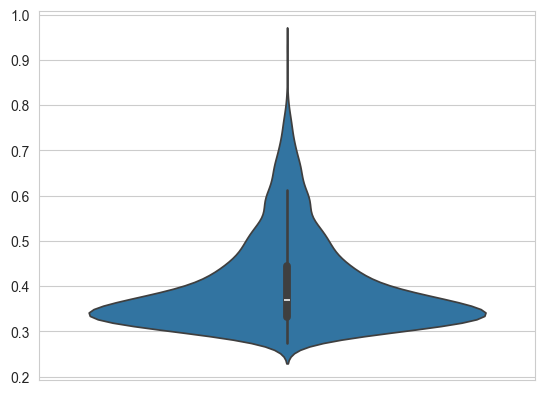

In [21]:
sns.violinplot(metric)

In [24]:
quantile = np.quantile(metric, 0.9)
quantile

0.5518691818250602

In [25]:
np.column_stack((-np.sort(-metric), np.argsort(-metric)))

array([[9.25548004e-01, 5.28000000e+02],
       [8.18365099e-01, 1.54300000e+03],
       [7.95677671e-01, 1.47000000e+03],
       ...,
       [2.79573274e-01, 2.70000000e+01],
       [2.76838804e-01, 8.56000000e+02],
       [2.74957395e-01, 1.30900000e+03]])

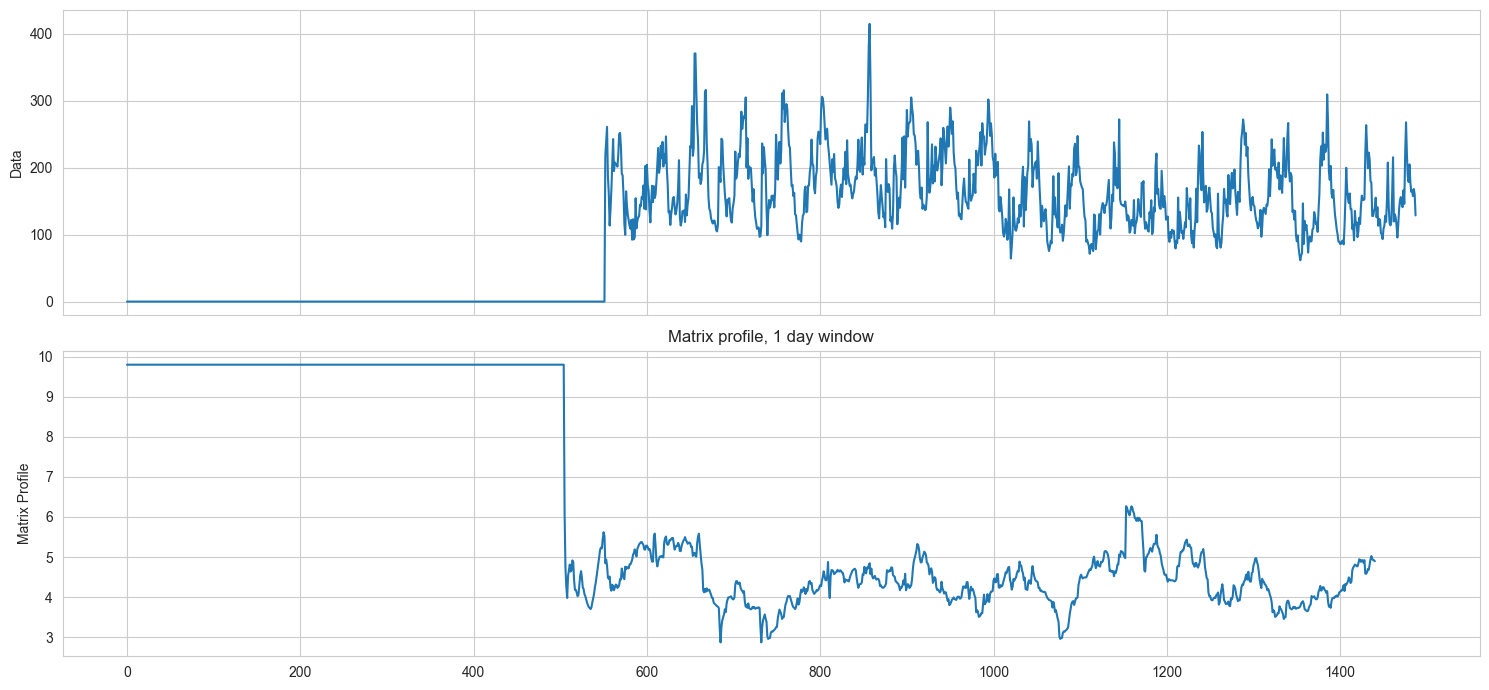

In [26]:
mprofile(data[528])

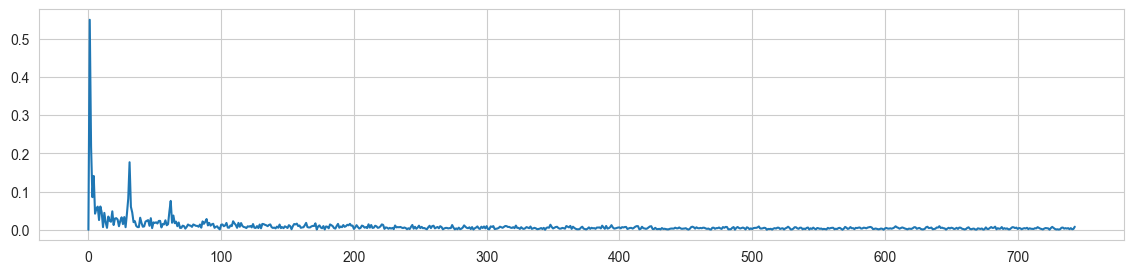

In [58]:
plt.plot(fft_norm[528, :744])
fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(3)

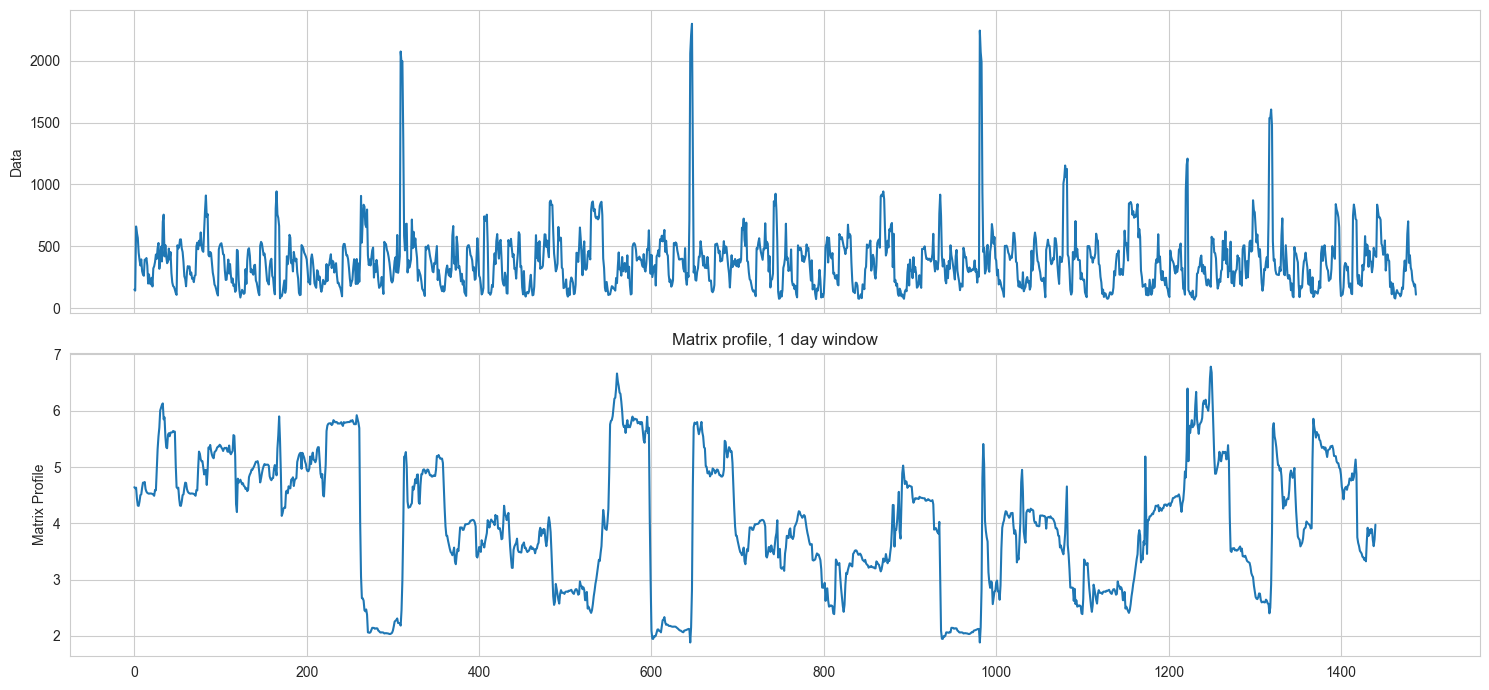

In [27]:
mprofile(data[1543])

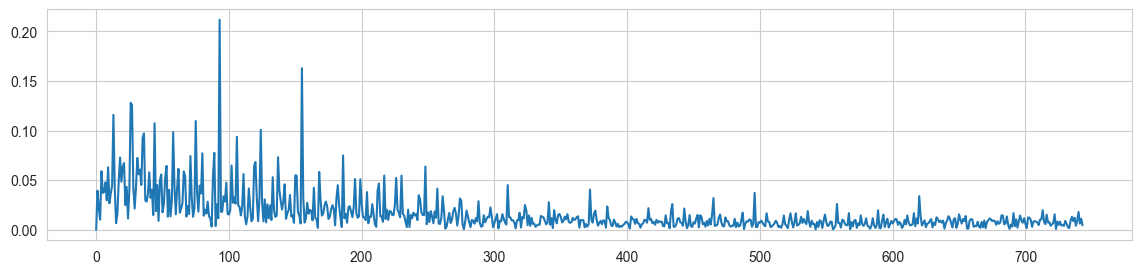

In [56]:
plt.plot(fft_norm[1543, :744])
fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(3)

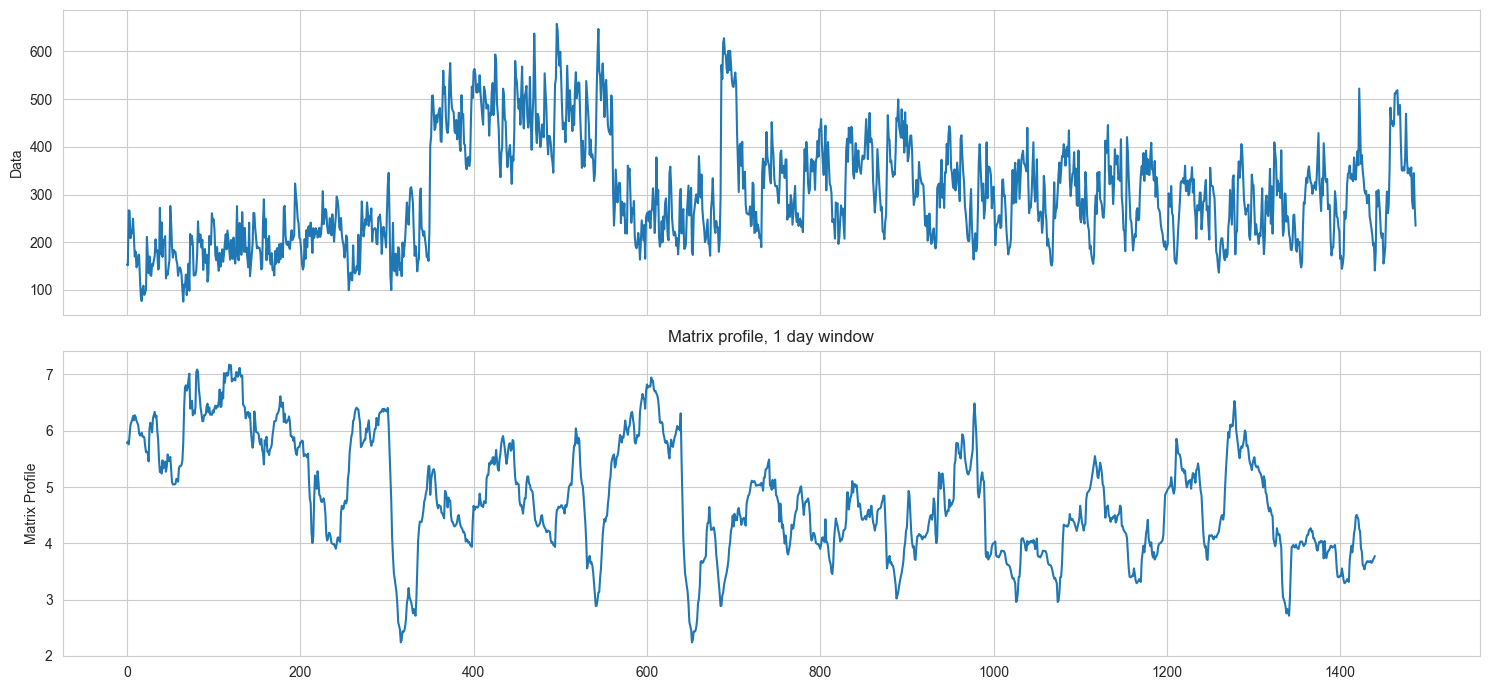

In [29]:
mprofile(data[893])

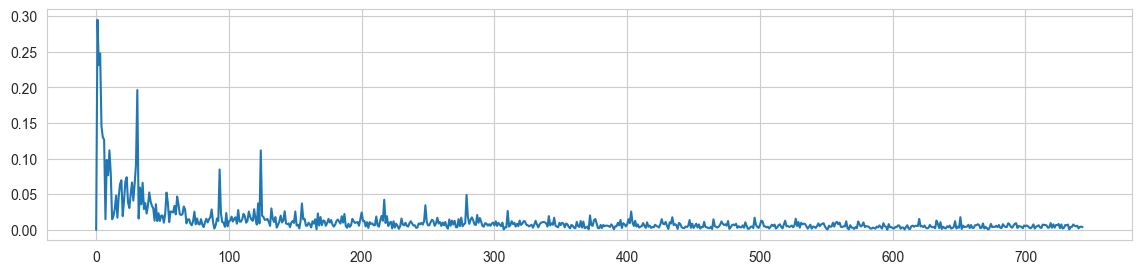

In [55]:
plt.plot(fft_norm[893, :744])
fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(3)

In [30]:
metric_local = np.max(np.abs(fft_norm_subtracted), axis=1)
metric_local

array([0.06465481, 0.07211357, 0.07526537, ..., 0.34013086, 0.0877233 ,
       0.06618844])

<Axes: >

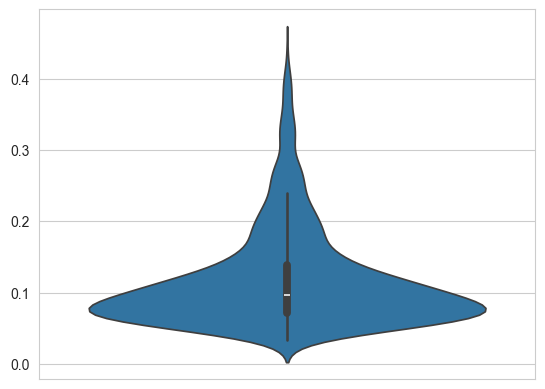

In [31]:
sns.violinplot(metric_local)

In [32]:
np.quantile(metric_local, 0.9)

0.21337098514972375

In [33]:
np.column_stack((-np.sort(-metric_local), np.argsort(-metric_local)))

array([[4.42101341e-01, 5.28000000e+02],
       [4.18791916e-01, 1.01800000e+03],
       [4.12634892e-01, 5.18000000e+02],
       ...,
       [3.47118384e-02, 1.06800000e+03],
       [3.44391000e-02, 4.07000000e+02],
       [3.37227976e-02, 9.19000000e+02]])

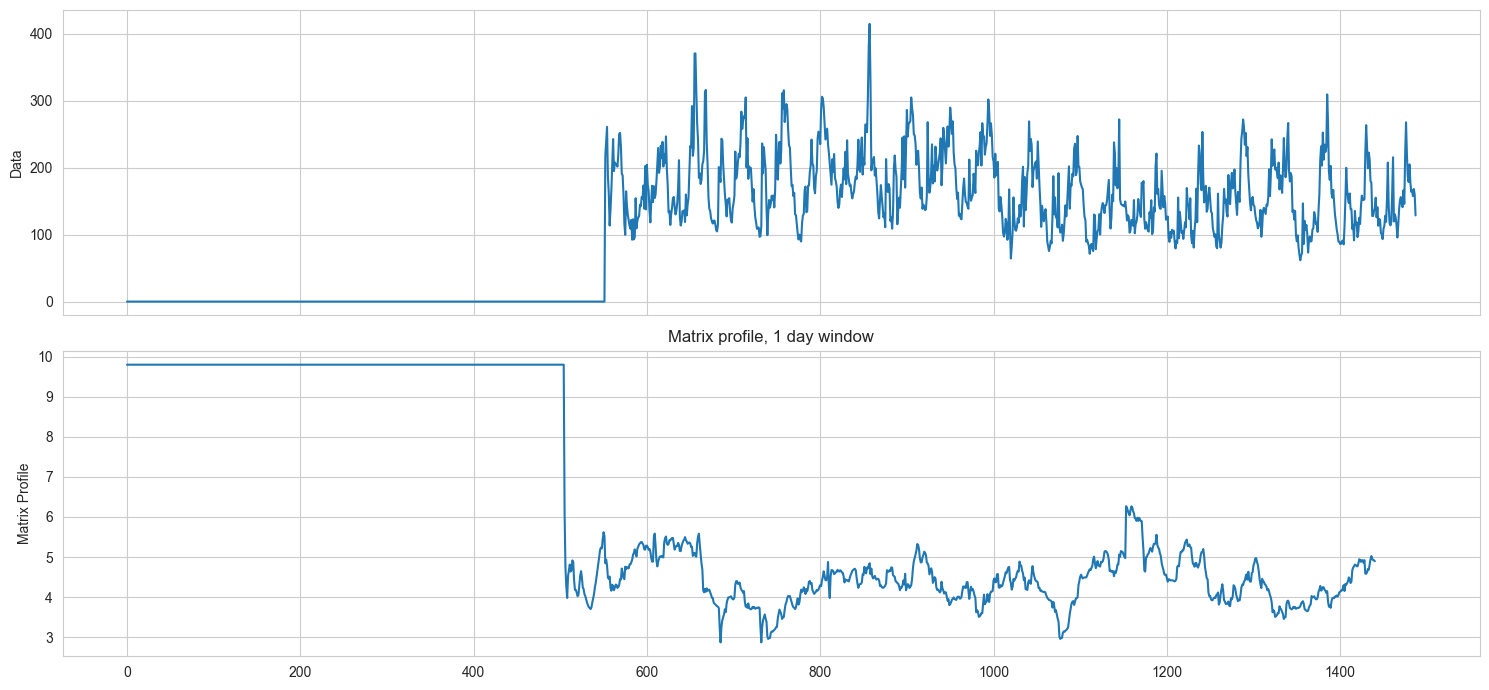

In [34]:
mprofile(data[528])

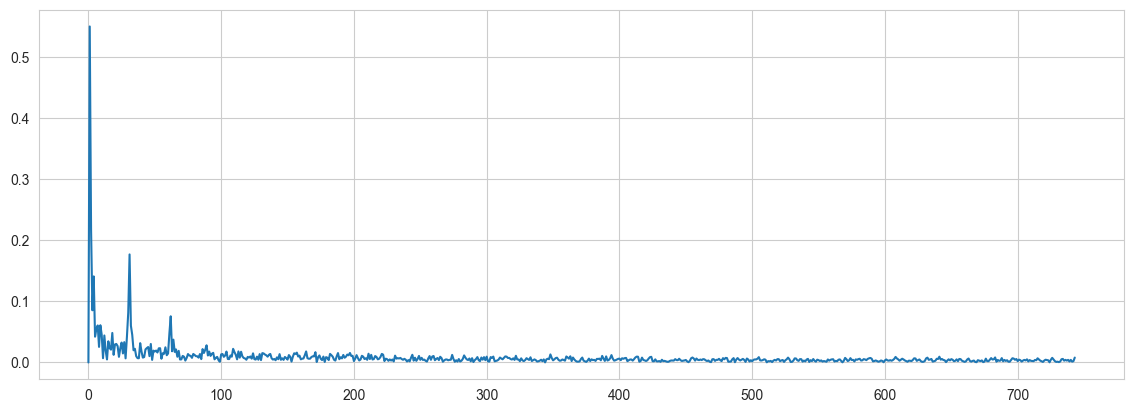

In [47]:
plt.plot(fft_norm[528, :744])
fig = plt.gcf()
fig.set_figwidth(14)

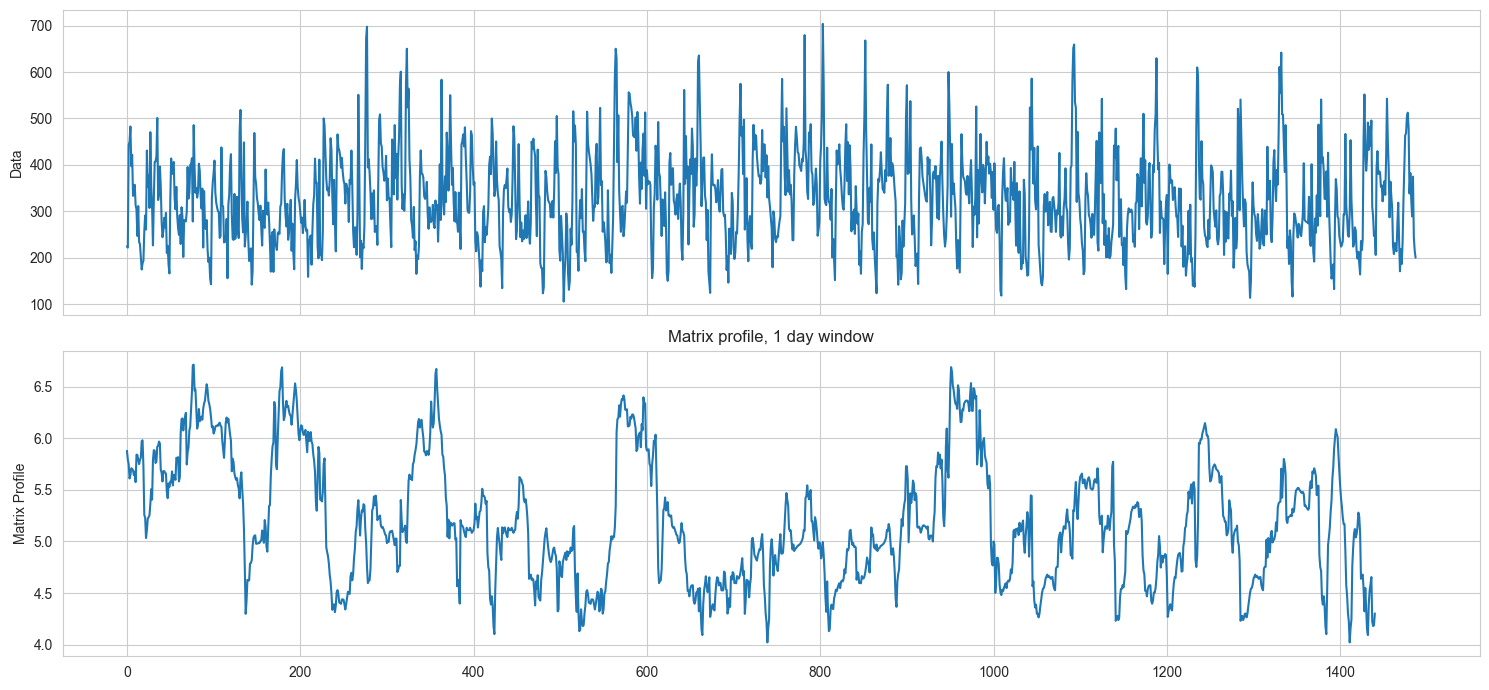

In [49]:
mprofile(data[1018])

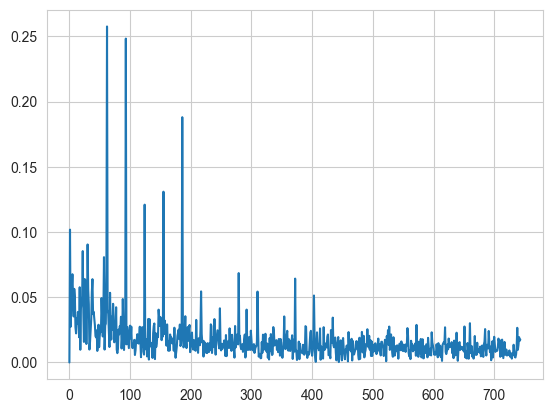

In [42]:
plt.plot(fft_norm[1018, :744])

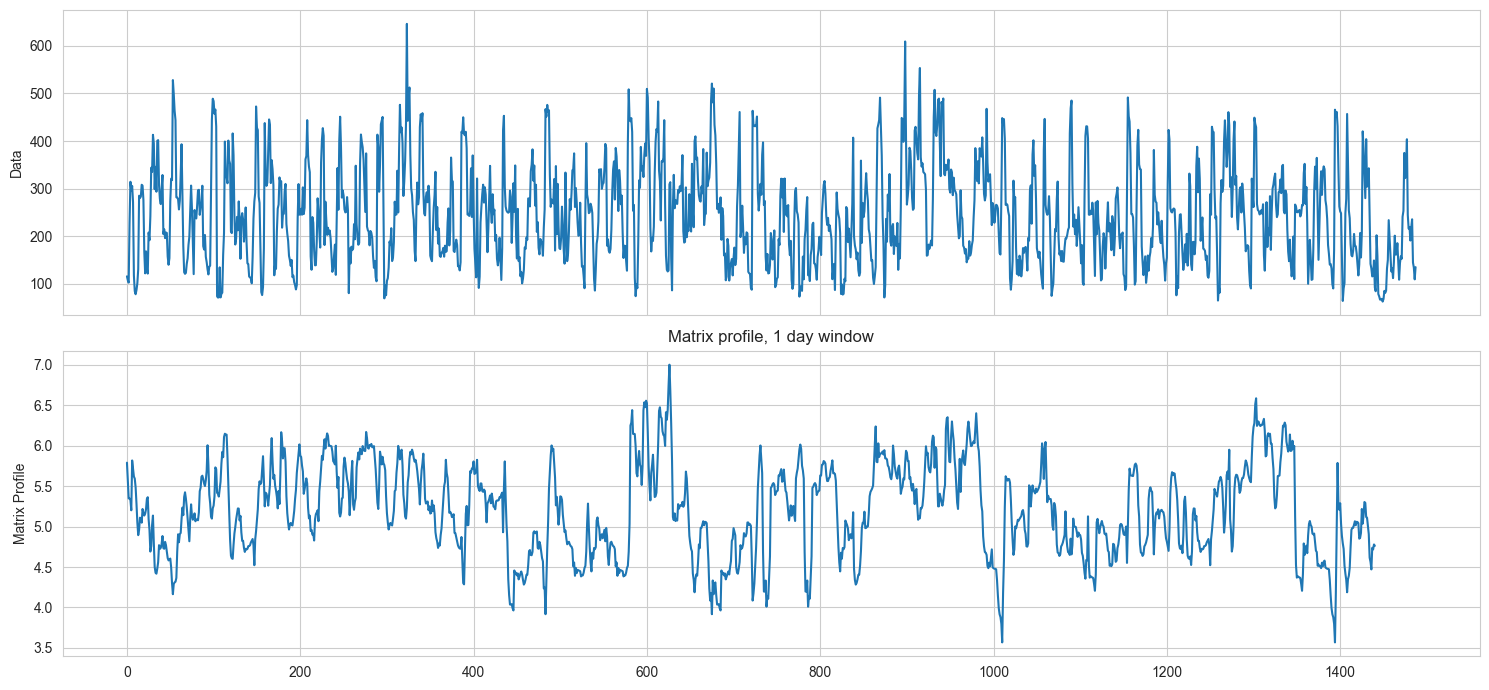

In [36]:
mprofile(data[518])

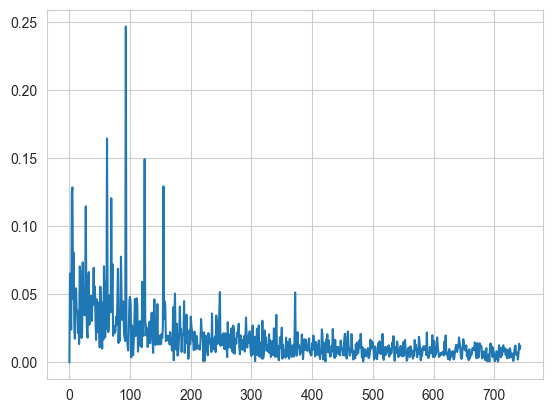

In [43]:
plt.plot(fft_norm[518, :744])